# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Data

In [2]:
def get_data(f, n_samples, noise, random_state, **kwargs):
    if kwargs.get("factor"):
        return f(n_samples=n_samples, noise=noise, random_state=random_state, factor=kwargs["factor"])
    return f(n_samples=n_samples, noise=noise, random_state=random_state)

In [3]:
SEED = 42
n_samples = 1000
noise = 0.1
factor = 0.5
X, y = get_data(make_circles, n_samples, noise, SEED, factor=factor)

## Visualisation

[]

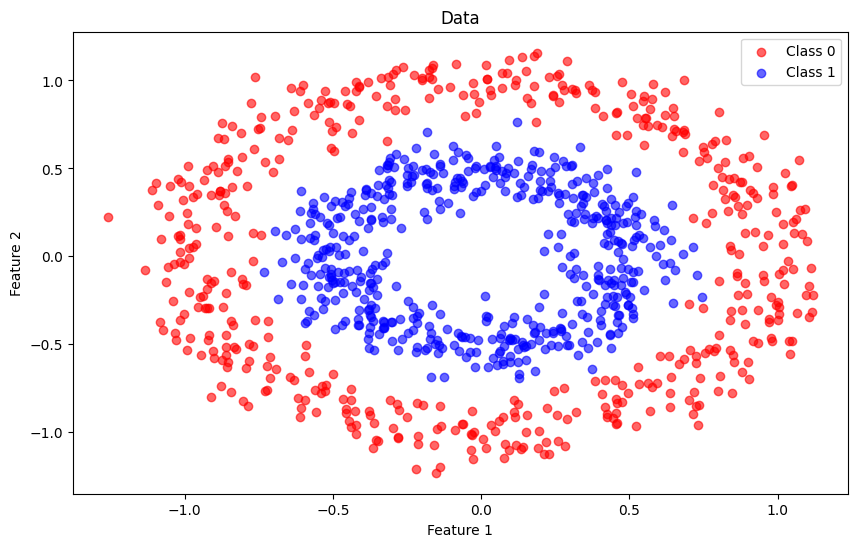

In [4]:
plt.figure(figsize=(10, 6))

plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", alpha=0.6, label="Class 0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", alpha=0.6, label="Class 1")

plt.title("Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.legend()

plt.plot()

## Preparation

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).reshape(-1, 1)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test).reshape(-1, 1)

# Model

In [7]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(2, 4)
        self.output = nn.Linear(4, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x

# Train

In [8]:
model = MLP()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 1000
train_losses = []

for epoch in range(epochs):
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch [{epoch}/{epochs}], loss: {loss.item():.4f}")

Epoch [0/1000], loss: 0.6638
Epoch [100/1000], loss: 0.3564
Epoch [200/1000], loss: 0.1573
Epoch [300/1000], loss: 0.0958
Epoch [400/1000], loss: 0.0703
Epoch [500/1000], loss: 0.0569
Epoch [600/1000], loss: 0.0486
Epoch [700/1000], loss: 0.0430
Epoch [800/1000], loss: 0.0389
Epoch [900/1000], loss: 0.0358


# Evaluation

[]

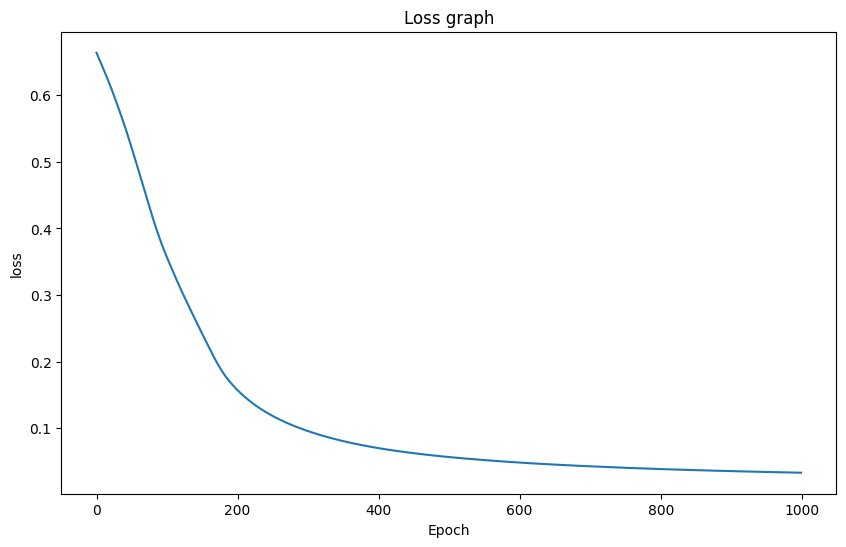

In [9]:
plt.figure(figsize=(10, 6))

plt.plot(train_losses)

plt.title("Loss graph")

plt.xlabel("Epoch")
plt.ylabel("loss")

plt.plot()

In [10]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    test_preds = (test_outputs > 0.5).float()
    test_accuracy = accuracy_score(y_test, test_preds)

print(f"Accuracy: {test_accuracy:.4f}")

Accuracy: 0.9500


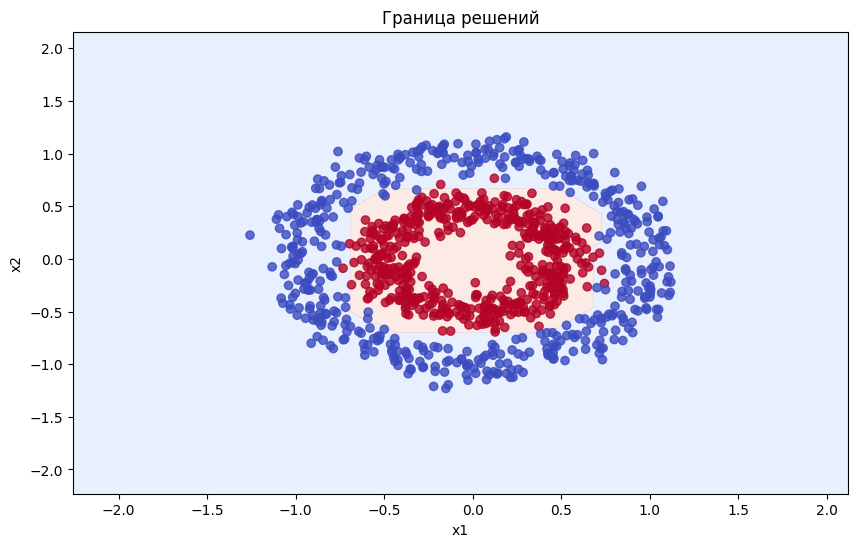

In [11]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_points_scaled = scaler.transform(mesh_points)
mesh_tensor = torch.FloatTensor(mesh_points_scaled)

with torch.no_grad():
    Z = model(mesh_tensor)
    Z = (Z > 0.5).float().numpy().reshape(xx.shape)

plt.figure(figsize=(10, 6))

plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, cmap="coolwarm")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", alpha=0.8)
plt.title(f"Граница решений")
plt.xlabel("x1")
plt.ylabel("x2")

plt.show()